<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *7*: *Classification With Neural Networks***

###**Tenggat Waktu: Minggu 5 Juni 2022, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab1_1406574005_Median Hardiv Nugraha.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Minggu 5 Juni 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


**Catatan:**
Harap jangan menunda - nunda mengerjakan karena Tutorial 7 kali ini cukup banyak pertanyaan yang harus dijawab.

## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [80]:
# Isi dengan data diri Anda
NAMA = "Muhammad Faisal Adi Soesatyo"
KELAS = "B"
NPM = "1906293184"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = [
    "https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html",
    "https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5",
    "https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/",
    "https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html",
    "https://scele.cs.ui.ac.id/pluginfile.php/145698/mod_resource/content/2/kasdd-12%20-%20Imbalanced%20Classification%202022.pdf",
    ""
]

In [81]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Muhammad Faisal Adi Soesatyo dari kelas B dengan NPM 1906293184, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Muhammad Faisal Adi Soesatyo)


# Teori

Neural Network (NN) merupakan suatu algoritma machine learning yang memiliki cara kerja menyerupai neuron pada otak manusia. Multi Layer Perceptron (MLP) merupakan salah satu jenis NN yang terdiri dari perceptron yang disusun menjadi beberapa layer. Contoh neuron pada NN dapat dilihat pada gambar berikut:

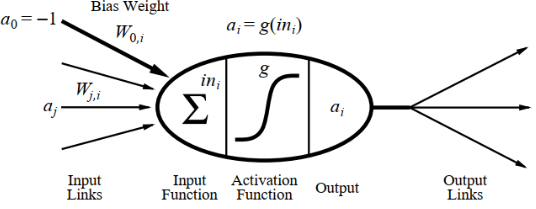

Pada gambar di atas, dapat dilihat bahwa pada setiap perceptron terdapat weight atau bobot untuk setiap input. Setiap input lalu dikalikan dengan bobot dan dijumlahkan seluruhnya. Selain itu, terdapat pula nilai bias yang merupakan suatu konstanta. Setelah operasi penjumlahan dilakukan, hasil penjumlahan dimasukkan ke activation function yang akan menghasilkan output. Terdapat beberapa jenis activation function, antara lain: TanH, ReLU, dan lain-lain yang dapat dilihat pada gambar di bawah ini.

![Activation function](https://miro.medium.com/max/1400/1*p_hyqAtyI8pbt2kEl6siOQ.png)

Weight suatu input didapatkan melalui training terhadap data setelah diinisiasi dengan bilangan random. Weight tersebut lalu akan di-update apabila output tidak sesuai dengan target yang diinginkan. Formula untuk melakukan update bobot/weight dapat dilihat pada rumus berikut:

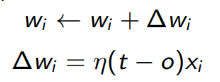

Penjelasan variabel pada rumus:
- $w_i$ merupakan weight untuk input ke-i
- $x_i$ merupakan input ke-i
- η merupakan learning rate
- t merupakan target output
- o merupakan output dari perceptron saat ini

Nilai w yang dicari merupakan nilai yang membuat selisih antara variabel t dan o menjadi sekecil mungkin.

Sumber:
- https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
- Slide mata kuliah Data Mining 2019

# Klasifikasi dengan Neural Network

## Eksplorasi Dataset

Pada tutorial ini, dataset yang digunakan adalah dataset Iris. Dataset Iris adalah dataset multivariat yang diperkenalkan oleh Ronald Fisher pada tahun 1936 melalui penelitiannya yang berjudul "***The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis***". 
  
Dataset ini berisi informasi tentang komponen bunga serta spesiesnya. Dataset ini berisi 50 baris sampel dari setiap spesies. Total terdapat 3 buah spesies dengan masing - masing berjumlah 50 baris data. Dataset ini berisi kolom sebagai berikut:

1.  **sepal_length** (Dalam unit centimeter, float)
2.  **sepal_width** (Dalam unit centimeter, float)
3.  **petal_length** (Dalam unit centimeter, float)
4.  **petal_width** (Dalam unit centimeter, float)
5.  **species** (3 Kelas, string)

Mari kita lihat apa saja informasi yang bisa kita dapatkan dari dataset ini!

In [82]:
# Import library yang dibutuhkan

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates

Dataset yang digunakan diambil dari UCI machine learning. Pastikan laptop Anda terhubung dengan internet. Kemudian, karena dataset ini tidak memiliki header, maka header harus ditambahkan secara manual

In [83]:
#Define the col names
colnames=["sepal_length", "sepal_width","petal_length","petal_width", "species"]

#Read the dataset
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None, names= colnames )

#Data
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [84]:
dataset.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Seperti yang terlihat pada output dari cell di atas, terlihat bahwa dataset memiliki 3 buah kelas yang masing - masing berjumlah sama. Sehingga bisa dikatakan dataset ini  tidak memiliki ketimpangan data

Setelah mendapatkan informasi terkait jumlah species, saatnya melakukan eksplorasi lebih jauh

In [85]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


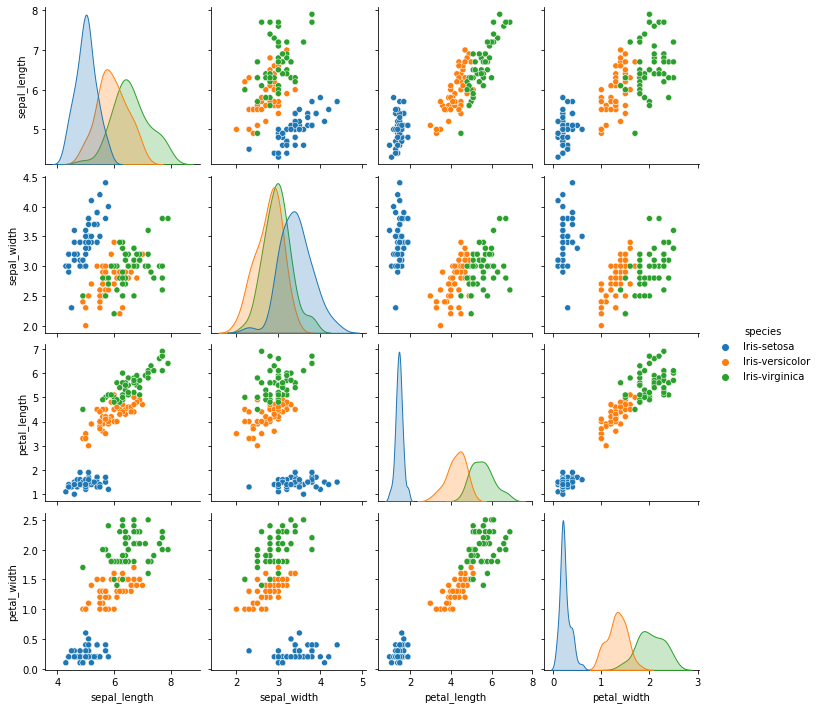

In [86]:
# Visualisasi dengan Pair Plotting

sns.pairplot(data=dataset, vars=('sepal_length','sepal_width','petal_length','petal_width'), hue='species')

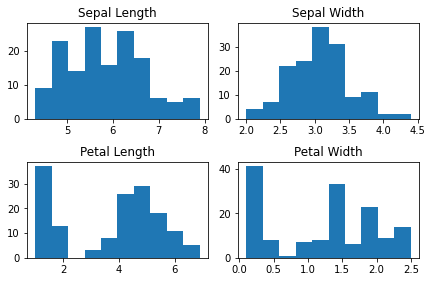

In [87]:
# Visualisasi dengan Bar Chart

n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(dataset['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(dataset['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(dataset['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(dataset['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');

# Menambahkan sedikit spacing
fig.tight_layout(pad=1.0);

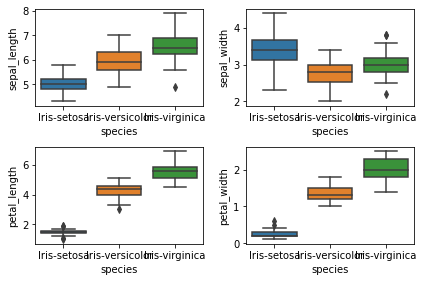

In [88]:
# Visualisasi dengan Boxplot

fig, axs = plt.subplots(2, 2)
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
sns.boxplot(x = 'species', y = 'sepal_length', data = dataset, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'species', y = 'sepal_width', data = dataset, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'species', y = 'petal_length', data = dataset, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'species', y = 'petal_width', data = dataset,  order = cn, ax = axs[1,1]);

# Menambahkan sedikit spacing
fig.tight_layout(pad=1.0);

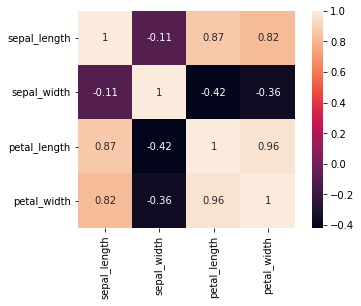

In [89]:
# Visualisasi Menggunakan Heatmap
corrmat = dataset.corr()
sns.heatmap(corrmat, annot = True, square = True);

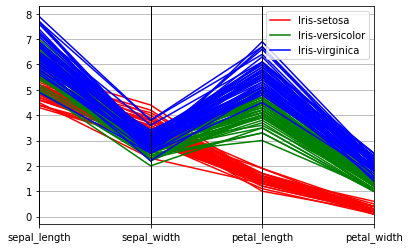

In [90]:
# Visualisasi Menggunakan Parallel Coordinate
parallel_coordinates(dataset, "species", color = ['red', 'green', 'blue']);

Setelah eksplorasi data selesai, sekarang saatnya membuat Classifier untuk Neural Network yang kita gunakan untuk dataset iris ini. Pembentukan classifier dilakukan pada section berikutnya

## Preprocessing Data

Pada bagian ini akan dilakukan preprocessing data pada dataset iris. Preprocessing melibatkan:
- Normalisasi Dataset
- Variable Encoding
- Pemisahan data menjadi X_train, X_test, y_train, dan y_test

Hal ini diperlukan agar Neural Network dapat menerima data dengan format yang sesuai ekspektasi algoritma tersebut,

### Pertanyaan A.1 [10 poin]
Berdasarkan dataframe yang digunakan, silakan Anda lakukan normalisasi dataframe tersebut
menggunakan jenis normalisasi Min-Max. Normalisasi dilakukan untuk semua kolom, kecuali kolom species.

In [91]:
# Jawaban A.1
# TODO: Tuliskan kode disini (Ganti None dengan jawaban)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

dataset_without_species = dataset.drop('species', axis = True)
scaler.fit(dataset_without_species)
dataset_norm = pd.DataFrame(scaler.transform(dataset_without_species))
dataset_norm.columns = ["sepal_length", "sepal_width","petal_length","petal_width"]

In [92]:
# Menampilkan 10 baris sampel pertama yang sudah dinormalisasi
dataset_norm.head(n=10)

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
5,0.305556,0.791667,0.118644,0.125000
6,0.083333,0.583333,0.067797,0.083333
7,0.194444,0.583333,0.084746,0.041667
8,0.027778,0.375000,0.067797,0.041667
9,0.166667,0.458333,0.084746,0.000000


### Pertanyaan A.2 [10 poin]
Silakan lakukan penggantian informasi species pada data sehingga yang awalnya berupa string menjadi bentuk integer.
Ikuti aturan konversi berikut:

Iris-setosa -> 1  
Iris-versicolor -> 2  
Iris-virginica -> 3

Kemudian tampilkan 10 baris data pertama

In [93]:
# Jawaban A.2
# TODO: Tuliskan kode disini
dataset_dummy = dataset.copy()
dataset_species = pd.DataFrame(dataset_dummy['species'])
for item in range(len(dataset_species)):
  content = dataset_species.iloc[item]
  if (content == 'Iris-setosa').bool():
    dataset_species.at[item, 'species'] = 1
  elif (content == 'Iris-versicolor').bool():
    dataset_species.at[item, 'species'] = 2
  elif (content == 'Iris-virginica').bool():
    dataset_species.at[item, 'species'] = 3

In [94]:
dataset_species.head(n = 10)

,species
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


**Combining two dataframe**

In [95]:
new_dataset = pd.concat([dataset_norm, dataset_species], axis = 1)
display(new_dataset.head(n = 10))

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1
5,0.305556,0.791667,0.118644,0.125000,1
6,0.083333,0.583333,0.067797,0.083333,1
7,0.194444,0.583333,0.084746,0.041667,1
8,0.027778,0.375000,0.067797,0.041667,1
9,0.166667,0.458333,0.084746,0.000000,1


Berikut ini adalah ekspektasi Jawaban Pertanyaan A.1 dan A.2 sebelum melanjutkan ke tahap selanjutnya. Harap periksa kembali sebelum melanjutkan agar tidak terjadi kesalahan di tahap berikutnya
  

<img src="https://i.ibb.co/Cmwr5fT/Screen-Shot-2021-11-24-at-13-06-25.png" alt="Fasilkom UI" width="500"/>

In [96]:
from sklearn.model_selection import train_test_split

# Membentuk 4 variabel X_train, X_test, y_train, dan y_test

X = new_dataset.iloc[:,:-1]
y = new_dataset.iloc[:, -1].values
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2021)

## Klasifikasi dengan Neural Network

Pada bagian ini kita akan melakukanklasifikasi pada dataset Iris menggunakan Neural Network menggunakan MLPClassifier pada Scikit-Learn. Pada kasus klasifikasi, kasus utama yang akan kita selesaikan adalah:
  

**Prediksi jenis species pada dataset Iris**
  

Catatan: Neural network membutuhkan data yang seluruhnya berisi data numerik, kemudian karena dataset yang kita gunakan tidak semuanya berisi data numerik, maka perlu dilakukan penyesuaian. **Jadi harap selesaikan terlebih dulu pertanyaan A.1 & A.2 sebelum melanjutkan ke tahap ini**

### Pembentukan Classifier & Training

Seperti pada classifier yang telah dipelajari sebelumnya (SVM, dan lainnya), MLPClassifier juga memiliki konfigurasi berupa hyperparameter yang bisa dikustomisasi sesuai kebutuhan.

Informasi lebih lanjut terkait parameter, bisa dilihat disini:  
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [97]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(
    solver='lbfgs',
    alpha=1e-5,
    hidden_layer_sizes=(3, 3),
    random_state=2021,
    verbose=True
)

In [98]:
classifier.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=2021,
              solver='lbfgs', verbose=True)

### Evaluasi
Evaluasi menggunakan beberapa metrik evaluasi untuk mengetahui seberapa baik performa yang didapatkan.  
  
Mencari tahu bagaimana hasil prediksi yang dihasilkan oleh MLPClassifier.
Hasil yang dikembalikan adalah berupa array yang berisi angka dengan rentang [1,3], dimana setiap angka merepresentasikan berikut:  

*   1 -> Iris-setosa
*   2 -> Iris-versicolor
*   3 -> Iris-virginica

Prediksi menggunakan dataframe yang digunakan untuk testing yang secara keseluruhan berjumlah 30% dari data

In [99]:
print("Hasil Prediksi MLPClassifier:")
prediction = classifier.predict(X_test)
print(prediction)

# Bandingkan hasil prediksi diatas dengan nilai pada variabel y_test (Data asli sejumlah 30% data)
print("\nGround Truth / Dataset Test Asli")
print(y_test)

Hasil Prediksi MLPClassifier:
[1 1 2 1 1 1 1 1 1 1 1 2 3 3 2 3 2 2 1 2 2 3 3 1 2 2 2 3 1 1 2 2 1 3 2 3 3
 1 3 2 3 3 1 2 3]

Ground Truth / Dataset Test Asli
[1 1 2 1 1 1 1 1 1 1 1 2 3 3 2 3 2 2 1 2 2 3 3 1 3 2 2 2 1 1 2 2 1 3 2 2 3
 1 3 2 3 3 1 2 3]


#### Fungsi Evaluasi (Klasifikasi)
Fungsi ini dapat digunakan kembali jika Anda memerlukannya untuk menjawab pertanyaan atau bereksperimen.

In [100]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score, ConfusionMatrixDisplay

def evaluate_classifier_performance(classifier, prediction, y_test = y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi:\n\n%s\n" % (classification_report(y_test, classifier.predict(X_test))))

    # Butuh informasi lebih lengkap? silakan disimak di bawah ini
    print('Accuracy:', accuracy_score(y_test, prediction))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro'))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro'))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro'))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro'))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))

    # Confusion Matrix
    print("\n\nConfusion Matrix\n")
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.93      0.88      0.90        16
           3       0.85      0.92      0.88        12

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45


Accuracy: 0.9333333333333333
Precision Macro Average: 0.9264957264957264
Precision Micro Average: 0.9333333333333333
Recall Macro Average: 0.9305555555555555
Recall Micro Average: 0.9333333333333333
F1 Macro Average: 0.927741935483871
F1 Micro Average: 0.9333333333333333


Confusion Matrix



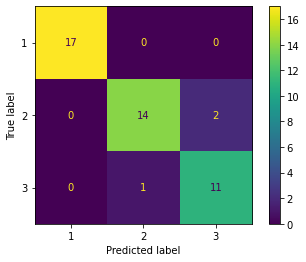

In [101]:
# Memanggil fungsi evaluasi untuk MLP Classifier
evaluate_classifier_performance(classifier, prediction)

Hasil evaluasi yang didapatkan sudah sangat baik. Hasil didapatkan akurasi sebesar 93%. Eits, tapi tunggu dulu, hasil ini bisa berubah lho tergantung bagaimana konfigurasi hyperparameter (atau yang akrab disebut dengan *Hyperparameter tuning*) yang Anda lakukan

### Pertanyaan A.3 [20 poin]

Lakukan hyperparameter tuning pada MLPClassifier dengan spesifikasi sebagai berikut:  
*   Solver: SGD (Stochastic Gradient Descent) 
*   Activation Function: ReLU
*   Ealy Stopping: True
*   Learning Rate: Invscaling
*   Learning Rate Init: 1e-5

Alpha, Hidden Layer Sizes, Random State, dan Verbose sama seperti contoh pertama

Kemudian jalankan hingga tahap evaluasi. Hasil apakah yang Anda dapatkan ?  
  
Tuliskan kode Anda, lalu di akhir evaluasi berikan penjelasan singkat bagaimana perbedaan hasil yang Anda dapatkan dengan hasil yang didapat dari contoh awal ?  
  
Penjelasan minimal 3 kalimat

In [102]:
from sklearn.neural_network import MLPClassifier
classifier_a3 = MLPClassifier(
    solver = 'sgd',
    activation = 'relu',
    early_stopping = True,
    learning_rate = 'invscaling',
    learning_rate_init = 1e-5,
    alpha = 1e-5,
    hidden_layer_sizes = (3, 3),
    random_state = 2021,
    verbose = True
)

In [103]:
classifier_a3.fit(X_train, y_train)

Iteration 1, loss = 1.25653171
Validation score: 0.181818
Iteration 2, loss = 1.25652482
Validation score: 0.181818
Iteration 3, loss = 1.25652118
Validation score: 0.181818
Iteration 4, loss = 1.25651773
Validation score: 0.181818
Iteration 5, loss = 1.25651446
Validation score: 0.181818
Iteration 6, loss = 1.25651135
Validation score: 0.181818
Iteration 7, loss = 1.25650841
Validation score: 0.181818
Iteration 8, loss = 1.25650562
Validation score: 0.181818
Iteration 9, loss = 1.25650298
Validation score: 0.181818
Iteration 10, loss = 1.25650047
Validation score: 0.181818
Iteration 11, loss = 1.25649810
Validation score: 0.181818
Iteration 12, loss = 1.25649586
Validation score: 0.181818
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid featu

MLPClassifier(alpha=1e-05, early_stopping=True, hidden_layer_sizes=(3, 3),
              learning_rate='invscaling', learning_rate_init=1e-05,
              random_state=2021, solver='sgd', verbose=True)

In [104]:
print("Hasil Prediksi MLPClassifier:")
prediction_a3 = classifier_a3.predict(X_test)
print(prediction_a3)

# Bandingkan hasil prediksi diatas dengan nilai pada variabel y_test (Data asli sejumlah 30% data)
print("\nGround Truth / Dataset Test Asli")
print(y_test)

Hasil Prediksi MLPClassifier:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]

Ground Truth / Dataset Test Asli
[1 1 2 1 1 1 1 1 1 1 1 2 3 3 2 3 2 2 1 2 2 3 3 1 3 2 2 2 1 1 2 2 1 3 2 2 3
 1 3 2 3 3 1 2 3]


Hasil Evaluasi:

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.36      1.00      0.52        16
           3       0.00      0.00      0.00        12

    accuracy                           0.36        45
   macro avg       0.12      0.33      0.17        45
weighted avg       0.13      0.36      0.19        45


Accuracy: 0.35555555555555557
Precision Macro Average: 0.11851851851851852
Precision Micro Average: 0.35555555555555557
Recall Macro Average: 0.3333333333333333
Recall Micro Average: 0.35555555555555557
F1 Macro Average: 0.17486338797814208
F1 Micro Average: 0.35555555555555557


Confusion Matrix



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

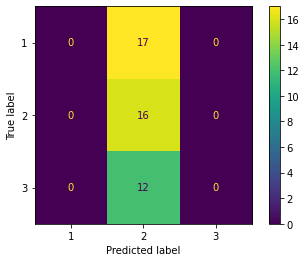

In [105]:
evaluate_classifier_performance(classifier_a3, prediction_a3)

**Silakan jelaskan di sini untuk menjawab pertanyaan A.3**

Berdasarkan hasil analisis yang saya lakukan pada pertanyaan A.3, saya mendapatkan hasil prediksi MLPClassifier yang melenceng cukup jauh dari dataset asli / ground truth. Hal ini pun didukung dengan hasil dari performance metric serta confusion matrixnya. Sangat jauh berbeda apabila dibandingkan dengan hasil contoh diatasnya. Saya berasumsi bahwa penerapan stochastic gradient descent pada problem ini tidak sesuai dengan ranahnya, sehingga menghasilkan error yang cukup besar.

### Pertanyaan A.4 [20 poin]

Lakukan hal yang sama dengan pertanyaan B.1 namun dengan kondisi berikut: 
*   Solver: Adam   
  
Alpha, Hidden Layer Sizes, Random State, dan Verbose sama seperti contoh pertama

Kemudian jalankan hingga tahap evaluasi. Hasil apakah yang Anda dapatkan ?  
  
Tuliskan kode Anda, lalu di akhir evaluasi berikan penjelasan singkat bagaimana perbedaan hasil yang Anda dapatkan dengan hasil yang didapat dari contoh awal ?  
  
Penjelasan minimal 3 kalimat

In [106]:
from sklearn.neural_network import MLPClassifier
classifier_a4 = MLPClassifier(
    solver = 'adam',
    activation = 'relu',
    early_stopping = True,
    learning_rate = 'invscaling',
    learning_rate_init = 1e-5,
    alpha = 1e-5,
    hidden_layer_sizes = (3, 3),
    random_state = 2021,
    verbose = True
)

In [107]:
classifier_a4.fit(X_train, y_train)

Iteration 1, loss = 1.25653171
Validation score: 0.181818
Iteration 2, loss = 1.25650693
Validation score: 0.181818
Iteration 3, loss = 1.25648215
Validation score: 0.181818
Iteration 4, loss = 1.25645737
Validation score: 0.181818
Iteration 5, loss = 1.25643259
Validation score: 0.181818
Iteration 6, loss = 1.25640781
Validation score: 0.181818
Iteration 7, loss = 1.25638304
Validation score: 0.181818
Iteration 8, loss = 1.25635828
Validation score: 0.181818
Iteration 9, loss = 1.25633354
Validation score: 0.181818
Iteration 10, loss = 1.25630880
Validation score: 0.181818
Iteration 11, loss = 1.25628407
Validation score: 0.181818
Iteration 12, loss = 1.25625934
Validation score: 0.181818
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid featu

MLPClassifier(alpha=1e-05, early_stopping=True, hidden_layer_sizes=(3, 3),
              learning_rate='invscaling', learning_rate_init=1e-05,
              random_state=2021, verbose=True)

In [108]:
print("Hasil Prediksi MLPClassifier:")
prediction_a4 = classifier_a3.predict(X_test)
print(prediction_a4)

# Bandingkan hasil prediksi diatas dengan nilai pada variabel y_test (Data asli sejumlah 30% data)
print("\nGround Truth / Dataset Test Asli")
print(y_test)

Hasil Prediksi MLPClassifier:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]

Ground Truth / Dataset Test Asli
[1 1 2 1 1 1 1 1 1 1 1 2 3 3 2 3 2 2 1 2 2 3 3 1 3 2 2 2 1 1 2 2 1 3 2 2 3
 1 3 2 3 3 1 2 3]


Hasil Evaluasi:

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        17
           2       0.36      1.00      0.52        16
           3       0.00      0.00      0.00        12

    accuracy                           0.36        45
   macro avg       0.12      0.33      0.17        45
weighted avg       0.13      0.36      0.19        45


Accuracy: 0.35555555555555557
Precision Macro Average: 0.11851851851851852


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Precision Micro Average: 0.35555555555555557
Recall Macro Average: 0.3333333333333333
Recall Micro Average: 0.35555555555555557
F1 Macro Average: 0.17486338797814208
F1 Micro Average: 0.35555555555555557


Confusion Matrix



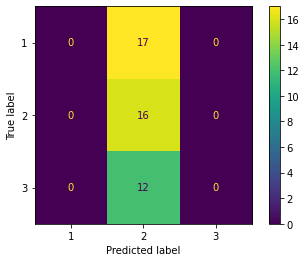

In [109]:
evaluate_classifier_performance(classifier_a4, prediction_a4)

**Silakan jelaskan di sini untuk menjawab pertanyaan A.4**

Hasil dari pertanyaan A.4 kurang lebih sama seperti pada pertanyaan A.3, yakni keduanya menghasilkan performance yang cukup buruk apabila dibandingkan dengan contoh menggunakan activation quasi-newton. Meskipun pada pertanyaan A.4 menggunakan adam, namun dasarnya tetap sama yakni stochastic gradient descent. Yang mana stochastic gradient descent sudah terbukti memberikan performa yang buruk untuk problem ini apabila dilihat dari hasil pertanyaan A.3.

Kesimpulan yang dapat ditarik dari hasil analisis pertanyaan A.3 dan A.4 adalah penggunaan stochastic gradient descent dan optimisasinya tidak sesuai untuk permasalahan ini. Hal ini dikarenakan kecilnya ukuran test yang digunakan pada problem ini, yakni hanya 150 row. Yang mana berdasarkan dokumentasi yang tertera, stochastic gradient descent bekerja lebih baik pada dataset yang besar. Sedangkan quasi-newton bekerja lebih baik pada dataset yang lebih kecil. Hal ini dikarenakan tipikal dari quasi-newton yang jauh lebih cepat prosesnya dan lebih cepat pula menemui titik konvergensi.

### Evaluasi dengan Classifier Lain
Mari kita lihat bagaimana performa Neural Network jika dibandingkan dengan classifier lain

#### Decision Tree (Gini & Entropy)
Berikut adalah hasil evaluasi klasifikasi dataset Iris apabila menggunakan Decision Tree. Kali ini menggunakan variasi Gini & Entropy untuk Decision Tree.

In [110]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

classifier_dt_gini = DecisionTreeClassifier(max_depth = 10, random_state = 2021, criterion='gini')
classifier_dt_gini.fit(X_train, y_train)
prediction_dt_gini = classifier_dt_gini.predict(X_test)

classifier_dt_entropy = DecisionTreeClassifier(max_depth = 10, random_state = 2021, criterion='entropy')
classifier_dt_entropy.fit(X_train, y_train)
prediction_dt_entropy = classifier_dt_entropy.predict(X_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.84      1.00      0.91        16
           3       1.00      0.75      0.86        12

    accuracy                           0.93        45
   macro avg       0.95      0.92      0.92        45
weighted avg       0.94      0.93      0.93        45


Accuracy: 0.9333333333333333
Precision Macro Average: 0.9473684210526315
Precision Micro Average: 0.9333333333333333
Recall Macro Average: 0.9166666666666666
Recall Micro Average: 0.9333333333333333
F1 Macro Average: 0.9238095238095237
F1 Micro Average: 0.9333333333333333


Confusion Matrix



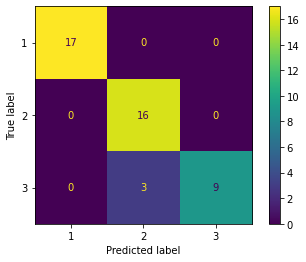

In [111]:
# Evaluasi Varian Gini
evaluate_classifier_performance(classifier_dt_gini, prediction_dt_gini)

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.82      0.88      0.85        16
           3       0.82      0.75      0.78        12

    accuracy                           0.89        45
   macro avg       0.88      0.88      0.88        45
weighted avg       0.89      0.89      0.89        45


Accuracy: 0.8888888888888888
Precision Macro Average: 0.8805704099821746
Precision Micro Average: 0.8888888888888888
Recall Macro Average: 0.875
Recall Micro Average: 0.8888888888888888
F1 Macro Average: 0.8770311813790075
F1 Micro Average: 0.8888888888888888


Confusion Matrix



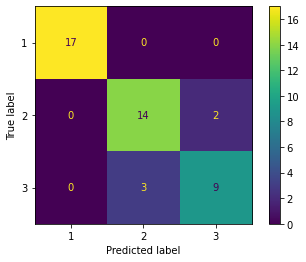

In [112]:
# Evaluasi Varian Entropy
evaluate_classifier_performance(classifier_dt_entropy, prediction_dt_entropy)

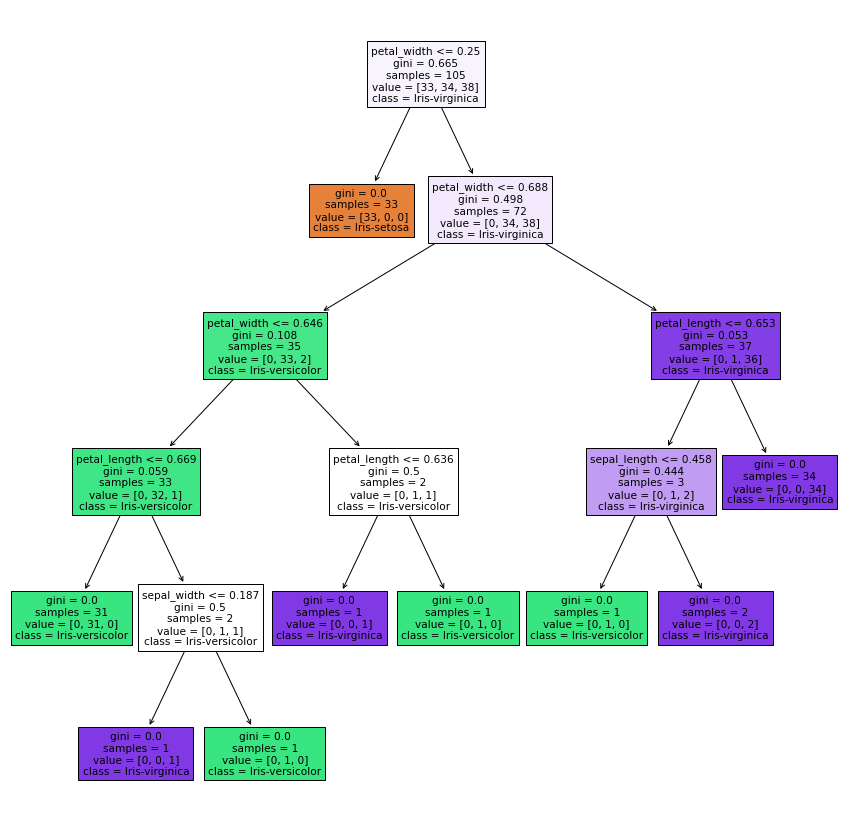

In [113]:
# Decision Tree (Varian Gini)
plt.figure(figsize = (15,15))
plot_tree(classifier_dt_gini, feature_names = fn, class_names = cn, filled = True);

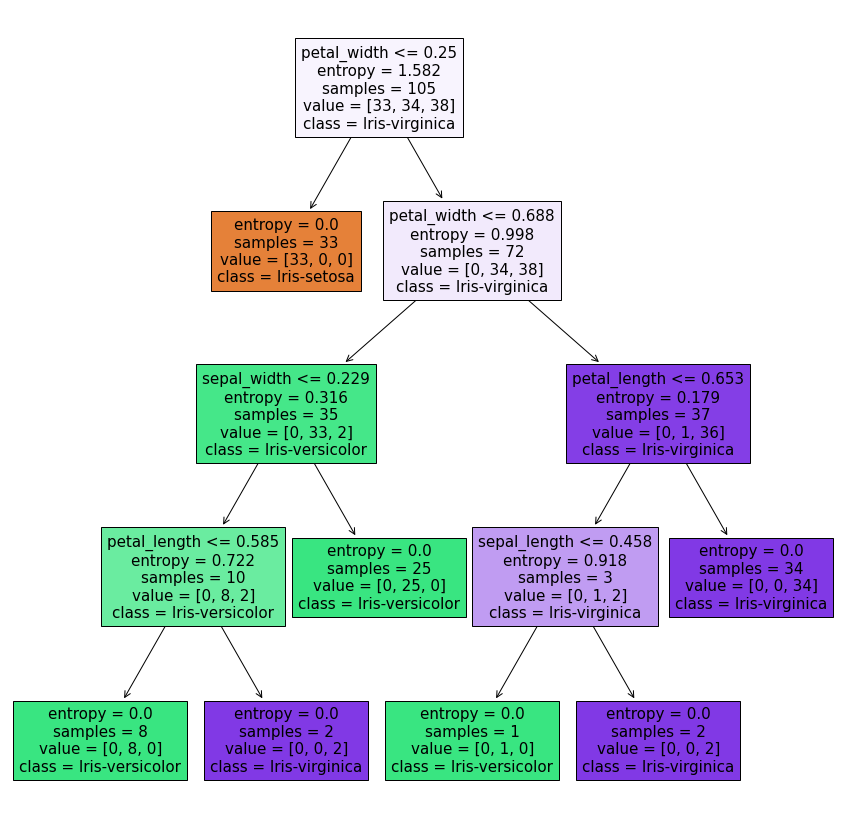

In [114]:
# Decision Tree (Varian Entropy)
plt.figure(figsize = (15,15))
plot_tree(classifier_dt_entropy, feature_names = fn, class_names = cn, filled = True);

#### KNN
Berikut adalah hasil evaluasi klasifikasi dataset Iris apabila menggunakan KNN

In [115]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45


Accuracy: 0.9777777777777777
Precision Macro Average: 0.9803921568627452
Precision Micro Average: 0.9777777777777777
Recall Macro Average: 0.9722222222222222
Recall Micro Average: 0.9777777777777777
F1 Macro Average: 0.9754062362758015
F1 Micro Average: 0.9777777777777777


Confusion Matrix



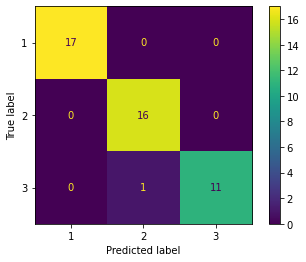

In [116]:
evaluate_classifier_performance(knn, knn_pred)

#### Naive Bayes
Berikut adalah hasil evaluasi klasifikasi dataset Iris apabila menggunakan Naive Bayes

In [117]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_train, y_train)
bayes_pred = bayes.predict(X_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.89      1.00      0.94        16
           3       1.00      0.83      0.91        12

    accuracy                           0.96        45
   macro avg       0.96      0.94      0.95        45
weighted avg       0.96      0.96      0.95        45


Accuracy: 0.9555555555555556
Precision Macro Average: 0.9629629629629629
Precision Micro Average: 0.9555555555555556
Recall Macro Average: 0.9444444444444445
Recall Micro Average: 0.9555555555555556
F1 Macro Average: 0.9500891265597148
F1 Micro Average: 0.9555555555555556


Confusion Matrix



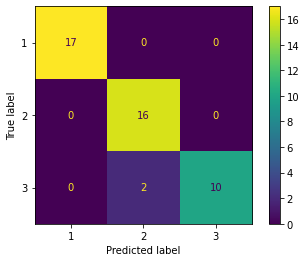

In [118]:
evaluate_classifier_performance(bayes, bayes_pred)

#### SVM
Berikut adalah hasil evaluasi klasifikasi dataset Iris apabila menggunakan SVM

In [119]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.89      1.00      0.94        16
           3       1.00      0.83      0.91        12

    accuracy                           0.96        45
   macro avg       0.96      0.94      0.95        45
weighted avg       0.96      0.96      0.95        45


Accuracy: 0.9555555555555556
Precision Macro Average: 0.9629629629629629
Precision Micro Average: 0.9555555555555556
Recall Macro Average: 0.9444444444444445
Recall Micro Average: 0.9555555555555556
F1 Macro Average: 0.9500891265597148
F1 Micro Average: 0.9555555555555556


Confusion Matrix



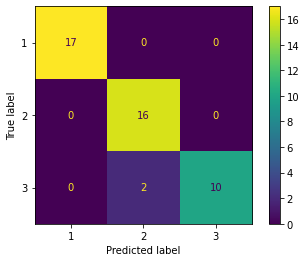

In [120]:
evaluate_classifier_performance(svm, svm_pred)

# Pertanyaan Bagian B

Pertanyaan A adalah pertanyaan yang disematkan di tengah - tengah tutorial. Pertanyaan B adalah pertanyaan diluar tutorial. Pada bagian ini Anda diharuskan menerepkan membuat model Neural Network untuk kasus klasifikasi

### Penjelasan Dataset

Dataset ini berisi mengenai Indeks Standar Pencemar Udara (ISPU) yang diukur dari 5 stasiun pemantau kualitas udara (SPKU) yang ada di Provinsi DKI Jakarta Tahun 2021

Penjelasan variabel dari data diatas sebagai berikut:

* **tanggal** : Tanggal pengukuran kualitas udara
* **pm10** : Partikulat salah satu parameter yang diukur
* **pm25** : Partikulat salah satu parameter yang diukur
* **so2** : Sulfida (dalam bentuk SO2) salah satu parameter yang diukur
* **co** : Carbon Monoksida salah satu parameter yand diukur
* **o3** : Ozon salah satu parameter yang diukur
* **no2** : NItrogen dioksida salah satu parameter yang diukur
* **max** : Nilai ukur paling tinggi dari seluruh parameter yang diukur dalam waktu yang sama 10
* **critical** : Parameter yang hasil pengukurannya paling tinggi
* **categori** : Kategori hasil perhitungan indeks standar pencemaran udara
* **location** : Lokasi pengukuran di stasiun

In [121]:
# Import Dataset
# !wget -q --no-check-certificate 'https://drive.google.com/file/d/1nr_2KmMD70GrU7Eu50K8AnHt7Oke-X8C/view?usp=sharing' -O polusi.csv

## Pertanyaan B.1 [30 poin]
Menggunakan dataset yang diberikan (**polusi.csv**) Silakan lakukan pemodelan klasifikasi menggunakan **MLPClassifier** untuk memprediksi kolom **categori**.  
  
Ubahlah kolom categori mengikuti ketentuan berikut:  
*   Jika categori bernilai TIDAK SEHAT, ubah menjadi 0
*   Jika categori bernilai SEDANG, ubah menjadi 1
*   Jika categori bernilai BAIK, ubah menjadi 2
*   Train : Test data memiliki perbandingan 80 : 20
*   Random state: 2021

Jawaban harus meliputi:  
1.   EDA (Exploratory Data Analysis)
2.   Data Preprocessing
3.   Pembentukan classifier dengan MLPClassifier
4.   Evaluasi menggunakan MLPClassifier (minimal mencakup Akurasi, Precision, Recall, dan F1)
5.   Evaluasi dan perbandingan menggunakan classifier lain (Minimal 3 classifier dan masing-masing mencakup Akurasi, Precision, Recall, dan F1)




### EDA

In [122]:
dataset_polusi = pd.read_csv('polusi.csv')
dataset_polusi.head()

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,1/1/2021,43,NaN,58,29,35,65,65,O3,SEDANG,DKI2
1,1/2/2021,58,NaN,86,38,64,80,86,PM25,SEDANG,DKI3
2,1/3/2021,64,NaN,93,25,62,86,93,PM25,SEDANG,DKI3
3,1/4/2021,50,NaN,67,24,31,77,77,O3,SEDANG,DKI2
4,1/5/2021,59,NaN,89,24,35,77,89,PM25,SEDANG,DKI3


In [123]:
dataset_polusi.groupby('categori').size()

categori
BAIK             3
SEDANG         223
TIDAK SEHAT    139
dtype: int64

In [124]:
dataset_polusi.describe()

,pm10,pm25,so2,co,o3,no2,max
count,365.000000,334.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,60.506849,94.694611,52.753425,15.391781,49.805479,34.115068,94.030137
std,15.155896,24.153839,11.193823,5.857975,12.234790,15.974152,24.408647
min,19.000000,33.000000,37.000000,7.000000,20.000000,9.000000,45.000000
25%,53.000000,78.250000,45.000000,11.000000,41.000000,24.000000,77.000000
50%,62.000000,94.500000,52.000000,14.000000,49.000000,31.000000,93.000000
75%,68.000000,108.750000,55.000000,18.000000,57.000000,39.000000,108.000000
max,179.000000,174.000000,126.000000,47.000000,151.000000,134.000000,179.000000


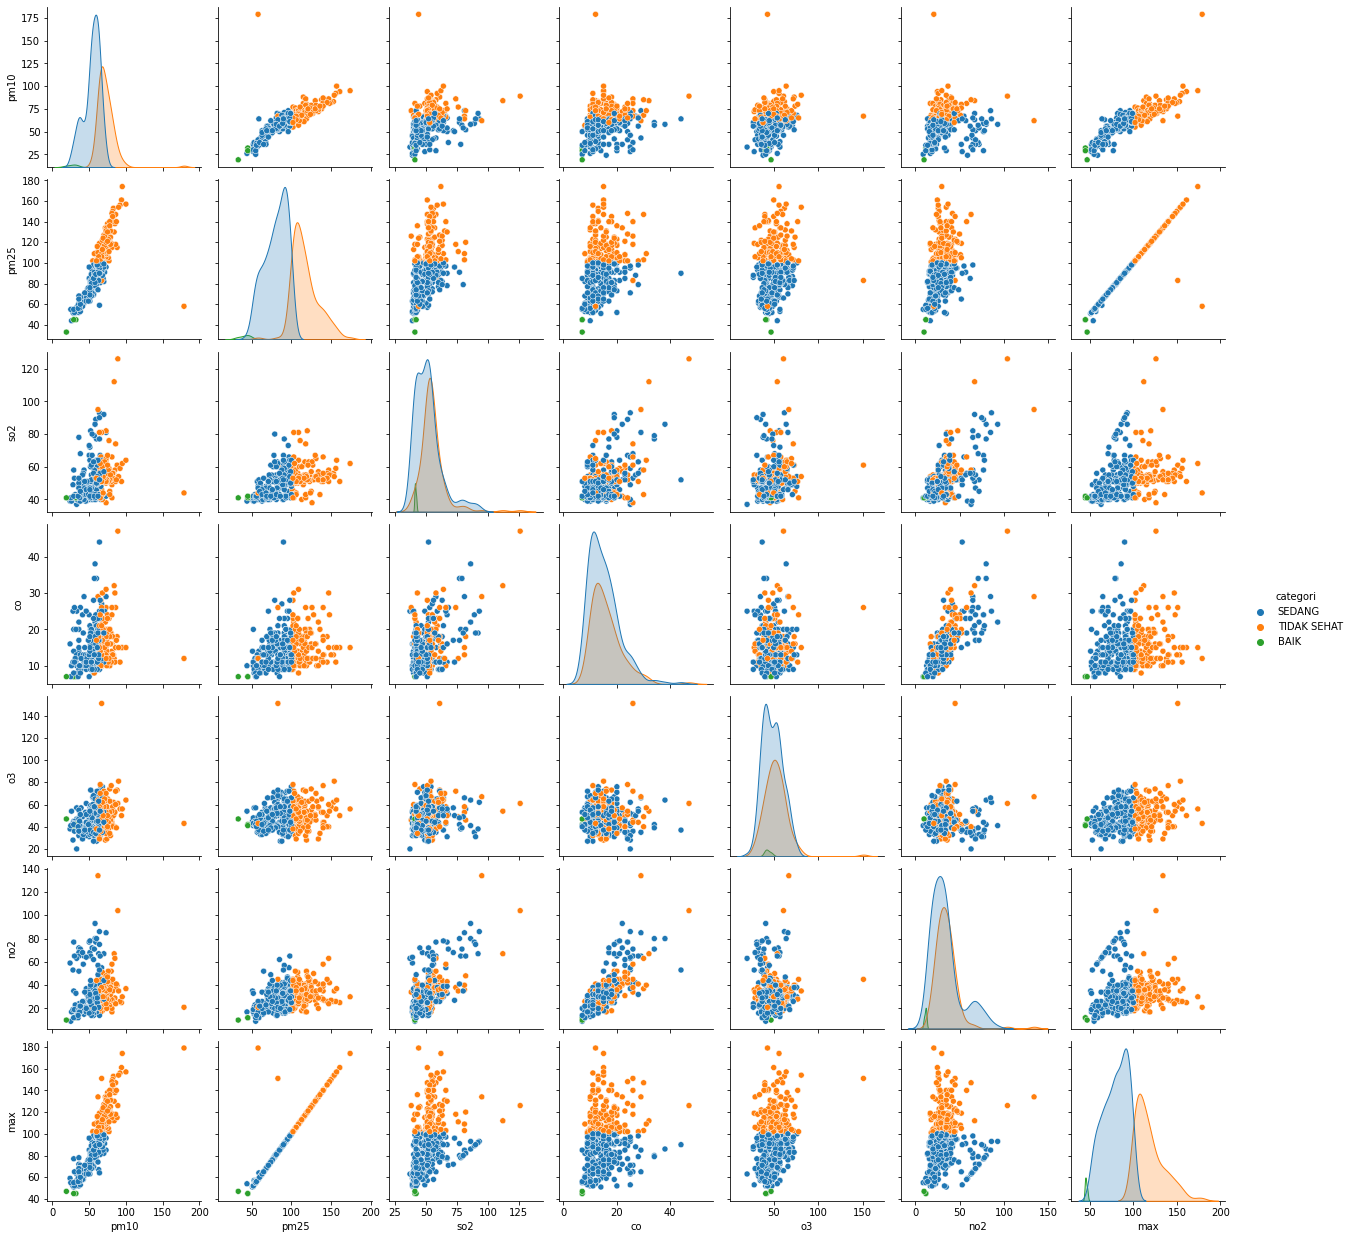

In [125]:
# Visualisasi dengan Pair Plotting

sns.pairplot(data=dataset_polusi, vars=('pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'max'), hue='categori')

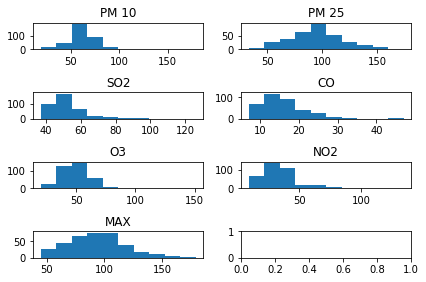

In [126]:
# Visualisasi dengan Bar Chart

n_bins = 10
fig, axs = plt.subplots(4, 2)
axs[0,0].hist(dataset_polusi['pm10'], bins = n_bins);
axs[0,0].set_title('PM 10');
axs[0,1].hist(dataset_polusi['pm25'], bins = n_bins);
axs[0,1].set_title('PM 25');
axs[1,0].hist(dataset_polusi['so2'], bins = n_bins);
axs[1,0].set_title('SO2');
axs[1,1].hist(dataset_polusi['co'], bins = n_bins);
axs[1,1].set_title('CO');
axs[2,0].hist(dataset_polusi['o3'], bins = n_bins);
axs[2,0].set_title('O3');
axs[2,1].hist(dataset_polusi['no2'], bins = n_bins);
axs[2,1].set_title('NO2');
axs[3,0].hist(dataset_polusi['max'], bins = n_bins);
axs[3,0].set_title('MAX');

# Menambahkan sedikit spacing
fig.tight_layout(pad=1.0);

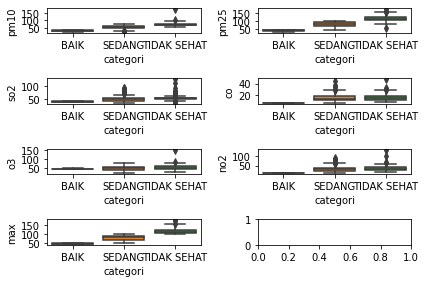

In [127]:
# Visualisasi dengan Boxplot

fig, axs = plt.subplots(4, 2)
fn = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'max']
cn = ["BAIK", "SEDANG", "TIDAK SEHAT"]
sns.boxplot(x = 'categori', y = 'pm10', data = dataset_polusi, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'categori', y = 'pm25', data = dataset_polusi, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'categori', y = 'so2', data = dataset_polusi, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'categori', y = 'co', data = dataset_polusi,  order = cn, ax = axs[1,1]);
sns.boxplot(x = 'categori', y = 'o3', data = dataset_polusi,  order = cn, ax = axs[2,0]);
sns.boxplot(x = 'categori', y = 'no2', data = dataset_polusi,  order = cn, ax = axs[2,1]);
sns.boxplot(x = 'categori', y = 'max', data = dataset_polusi,  order = cn, ax = axs[3,0]);

# Menambahkan sedikit spacing
fig.tight_layout(pad=1.0);

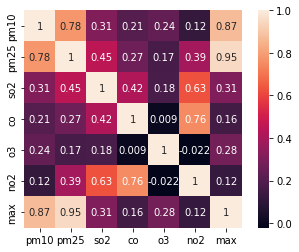

In [128]:
# Visualisasi Menggunakan Heatmap
corrmat = dataset_polusi.corr()
sns.heatmap(corrmat, annot = True, square = True);

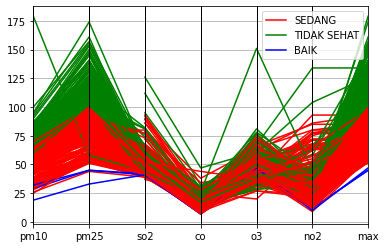

In [129]:
# Visualisasi Menggunakan Parallel Coordinate
parallel_coordinates(dataset_polusi.drop(['tanggal', 'location', 'critical'], axis = True), 
                     'categori', color = ['red', 'green', 'blue']);

### Preprocessing Data

In [130]:
mean_value_pm25 = dataset_polusi['pm25'].mean()
dataset_polusi['pm25'].fillna(value = mean_value_pm25, inplace = True)

In [131]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

dataset_without_unnecessary_field = dataset_polusi.drop(['categori', 'tanggal', 'critical', 'location'], axis = True)
scaler.fit(dataset_without_unnecessary_field)
dataset_norm_polusi = pd.DataFrame(scaler.transform(dataset_without_unnecessary_field))
dataset_norm_polusi.columns = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'max']

In [132]:
# Menampilkan 10 baris sampel pertama yang sudah dinormalisasi
dataset_norm_polusi.head(n=10)

,pm10,pm25,so2,co,o3,no2,max
0,0.15000,0.43755,0.235955,0.550,0.114504,0.448,0.149254
1,0.24375,0.43755,0.550562,0.775,0.335878,0.568,0.305970
2,0.28125,0.43755,0.629213,0.450,0.320611,0.616,0.358209
3,0.19375,0.43755,0.337079,0.425,0.083969,0.544,0.238806
4,0.25000,0.43755,0.584270,0.425,0.114504,0.544,0.328358
5,0.33750,0.43755,0.494382,0.550,0.351145,0.608,0.298507
6,0.10625,0.43755,0.168539,0.375,0.267176,0.504,0.201493
7,0.11875,0.43755,0.348315,0.475,0.236641,0.496,0.194030
8,0.25625,0.43755,0.449438,0.675,0.167939,0.568,0.261194
9,0.03125,0.43755,0.022472,0.225,0.137405,0.400,0.104478


In [133]:
dataset_polusi_dummy = dataset_polusi.copy()
dataset_categori = pd.DataFrame(dataset_polusi_dummy['categori'])
for item in range(len(dataset_categori)):
  content = dataset_categori.iloc[item]
  if (content == 'TIDAK SEHAT').bool():
    dataset_categori.at[item, 'categori'] = 0
  elif (content == 'SEDANG').bool():
    dataset_categori.at[item, 'categori'] = 1
  elif (content == 'BAIK').bool():
    dataset_categori.at[item, 'categori'] = 2

In [134]:
dataset_categori.head(n = 10)

,categori
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [135]:
new_dataset_polusi = pd.concat([dataset_norm_polusi, dataset_categori], axis = 1)
display(new_dataset_polusi.head(n = 10))

,pm10,pm25,so2,co,o3,no2,max,categori
0,0.15000,0.43755,0.235955,0.550,0.114504,0.448,0.149254,1
1,0.24375,0.43755,0.550562,0.775,0.335878,0.568,0.305970,1
2,0.28125,0.43755,0.629213,0.450,0.320611,0.616,0.358209,1
3,0.19375,0.43755,0.337079,0.425,0.083969,0.544,0.238806,1
4,0.25000,0.43755,0.584270,0.425,0.114504,0.544,0.328358,1
5,0.33750,0.43755,0.494382,0.550,0.351145,0.608,0.298507,1
6,0.10625,0.43755,0.168539,0.375,0.267176,0.504,0.201493,1
7,0.11875,0.43755,0.348315,0.475,0.236641,0.496,0.194030,1
8,0.25625,0.43755,0.449438,0.675,0.167939,0.568,0.261194,1
9,0.03125,0.43755,0.022472,0.225,0.137405,0.400,0.104478,1


In [174]:
from sklearn.model_selection import train_test_split

# Membentuk 4 variabel X_train, X_test, y_train, dan y_test

X = new_dataset_polusi.iloc[:,:-1]
y = new_dataset_polusi.iloc[:, -1].values
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2021)

In [175]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors = 2)
X_train, y_train = oversample.fit_resample(X_train, y_train)

### MLP Classifier

In [164]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(
    solver='lbfgs',
    alpha=1e-5,
    hidden_layer_sizes=(3, 3),
    random_state=2021,
    verbose=True,
    max_iter = 1e3
)

In [165]:
classifier.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), max_iter=1000.0,
              random_state=2021, solver='lbfgs', verbose=True)

In [166]:
print("Hasil Prediksi MLPClassifier:")
prediction = classifier.predict(X_test)
print(prediction)

# Bandingkan hasil prediksi diatas dengan nilai pada variabel y_test (Data asli sejumlah 30% data)
print("\nGround Truth / Dataset Test Asli")
print(y_test)

Hasil Prediksi MLPClassifier:
[0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1
 0 1 1 1 1 0 1 1 1 0 1 1 1 2 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0]

Ground Truth / Dataset Test Asli
[0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0]


### Evaluasi

In [167]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score, ConfusionMatrixDisplay

def evaluate_classifier_performance(classifier, prediction, y_test = y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi:\n\n%s\n" % (classification_report(y_test, classifier.predict(X_test))))

    # Butuh informasi lebih lengkap? silakan disimak di bawah ini
    print('Accuracy:', accuracy_score(y_test, prediction))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro', zero_division = 0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro', zero_division = 0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro', zero_division = 0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro', zero_division = 0))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro', zero_division = 0))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro', zero_division = 0))

    # Confusion Matrix
    print("\n\nConfusion Matrix\n")
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hasil Evaluasi:

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        26
           1       1.00      0.89      0.94        47
           2       0.00      0.00      0.00         0

    accuracy                           0.93        73
   macro avg       0.62      0.63      0.62        73
weighted avg       0.95      0.93      0.94        73


Accuracy: 0.9315068493150684
Precision Macro Average: 0.6222222222222222
Precision Micro Average: 0.9315068493150684
Recall Macro Average: 0.6312056737588653
Recall Micro Average: 0.9315068493150684
F1 Macro Average: 0.6241305510968432
F1 Micro Average: 0.9315068493150684


Confusion Matrix



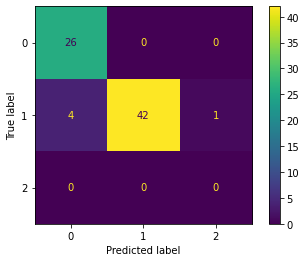

In [168]:
# Memanggil fungsi evaluasi untuk MLP Classifier
evaluate_classifier_performance(classifier, prediction)

### Comparison

#### Decision Tree

In [188]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

classifier_dt_gini = DecisionTreeClassifier(max_depth = 10, random_state = 2021, criterion='gini')
classifier_dt_gini.fit(X_train, y_train)
prediction_dt_gini = classifier_dt_gini.predict(X_test)

classifier_dt_entropy = DecisionTreeClassifier(max_depth = 10, random_state = 2021, criterion='entropy')
classifier_dt_entropy.fit(X_train, y_train)
prediction_dt_entropy = classifier_dt_entropy.predict(X_test)

In [ ]:
# Evaluasi Varian Gini
evaluate_classifier_performance(classifier_dt_gini, prediction_dt_gini)

#### KNN

In [190]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [ ]:
evaluate_classifier_performance(knn, knn_pred)

#### Naive Bayes

In [192]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_train, y_train)
bayes_pred = bayes.predict(X_test)

In [ ]:
evaluate_classifier_performance(bayes, bayes_pred)

#### SVM

In [194]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [ ]:
evaluate_classifier_performance(svm, svm_pred)

## Pertanyaan B.2 [10 poin]
1. Pada rumus untuk melakukan update terhadap weight/bobot, apabila nilai variabel o lebih besar daripada t, apakah nilai weight setelah di-update lebih besar daripada nilai sebelum di-update? Jelaskan alasannya.
2. Dari jawaban yang Anda dapatkan dari B.1, apakah MLP lebih baik daripada classifier lain yang Anda gunakan? Mengapa hal tersebut bisa terjadi? Apa kesimpulan Anda ?

Jawaban Pertanyaan B.2

1.   Tidak. Melainkan lebih kecil dari weight sebelumnya. Pada rumus tertulis bahwa delta weight(i) = miu * (t - o) * x(i). Apabila o > t itu artinya penghitungan selisih antara t dan o akan menghasilkan negatif. Apabila diasumsikan x(i) dan miu bernilai positif, maka delta weight(i) akan menghasilkan negatif. Dengan demikian weight setelah update akan lebih rendah daripada sebelum update.
2.   Ya. Berdasarkan development yang saya jalani, hasil dari MLPClassifier memberikan result yang lebih menyeluruh untuk kesemua label yang ada. Berbeda dengan keempat classifier lainnya. Pada keempat classifier lainnya, seperti decision tree, KNN, naive bayes dan SVM hanya menampilkan kelas mayoritasnya saja yakni label 0 dan 1. Untuk label 2 tidak ditampilkan. Hal ini bisa terjadi karena, berdasarkan dokumentasi yang saya baca, MLPClassifier memang diperuntukkan model yang memiliki layer lebih dari satu. Dengan kata lain, multi-layer perceptron. Berdasarkan karakteristik data yang saya pelajari, data pada problem ini memiliki kecenderungan untuk tidak dapat diklasifikasikan hanya dengan single layer, perlu beberapa layer dalam penanganannya. Disamping itu juga, data ini merupakan kasus imbalanced, sehingga perlu penanganan khusus dalam pembangunan modelnya.

Kesimpulan, penggunaan MLPClassifier untuk permasalahan neural network sudah sangat tepat penggunaannya. Dapat dilihat dari hasil komputasi yang saya lakukan diatas bahwa hasil dari MLP jauh lebih baik ketimbang classifier lainnya.